# Level "The Last Christmas"

## Play it at http://zetaflow.skylogic.ca/game/profile/14735

Made by Matthew Dirks (~MD), December 2020.

In [4]:
import numpy as np

In [5]:
from sys import path
path.append('..')
from zf_function_wrappers import *
from zf_common import *
from zf_macro_functions import *

In [6]:
FAR_AWAY = 9999
BIG = 2000
SIZE_0 = 0

In [7]:
# store all commands here (these go into the "AI, lives" window in http://zetaflow.skylogic.ca/game/edit)
cmds= []

# helper function: just adds one or more commands to the cmds array
def append(cmd):
    if (isinstance(cmd, str)):
        cmds.append(cmd)
        print(cmd)
    elif (isinstance(cmd, list)):
        cmds.extend(cmd)
        print('\n'.join(str(x) for x in cmd))
    else:
        raise(ValueError('What is this? {} {}'.format(type(cmd), cmd)))
    

# Overview

There are 4 main sections to this level:

1. Walls, triggers, and special weapons

These are the first things the player sees and has to destroy.

![](./screenshots/walls_and_triggers.png "")

2. Flying assistant ("ship2")

The red ship that flies by occasionally:

![](./screenshots/ship2.png "")

3. "star"-ship (initially frozen)

![](./screenshots/starship.png "")

4. Special-effect Ending

![](./screenshots/heart.png "")

# 1. Walls, triggers, and special weapons

In [8]:
# Part numbers with names (so we can refer to parts by name rather than by number)
parts = {
    'killer_circle': 8, # circle that is invincible and placed at center of screen. This is the part that auto-kills the player by expanding in size.
    'kill_switch_1': 5,
    'kill_switch_2': 6,
    'kill_switch_3': 7,
    
    # the RIGHT parts to kill (circles)
    'kill_me_first': 9,
    'first_replacement': 12, 
    'second_replacement': 13,
    'third_replacement': 14,
    
    # parent parts for the kill switches and shields, and weapons
    # These are the 4 "switch1b" in each corner
    'corner_UL': 1,
    'corner_BL': 3,
    'corner_UR': 2,
    'corner_BR': 4,
    
    # "spread" machine guns
    'BL_spread_spinner': 21, # "jet"
    'BR_spread_spinner': 26, # "jet"
    'UR_spread_spinner': 35, # "jet"
    
    'BL_spread_0': 15,
    'BL_spread_1': 16,
    'BL_spread_2': 17,
    'BL_spread_3': 18,
    
    'BR_spread_0': 27,
    'BR_spread_1': 28,
    'BR_spread_2': 29,
    'BR_spread_3': 30,
    
    'UR_spread_0': 31,
    'UR_spread_1': 32,
    'UR_spread_2': 33,
    'UR_spread_3': 34,
    
    # walls
    'wall_1': 22,
    'wall_2': 23,
    'wall_3': 24,
    'wall_4': 25,
    
    'BR_rocket_1': 36,
    'BR_rocket_2': 37,
    'BR_rocket_3': 38,
    'BR_rocket_4': 39,
    'BR_rocket_5': 40,
    'BR_rocket_6': 41,
    
}
kill_switches = [5, 6, 7] 

In [9]:
def on_death_kill_player(part_num):
    """ when part dies, auto-kill the player """
    
    # first, set height and width to fill the whole screen
    _cmds = []
    
    _cmds.append(makeTriggerDeath(part_num, setWidth(parts['killer_circle'], BIG)))
    _cmds.append(makeTriggerDeath(part_num, setHeight(parts['killer_circle'], BIG)))
    
    # then, after 1 second, revert back
    # NEVERMIND - player is doomed at this point! :)
    #_cmds.append(makeTriggerDeath(part_num, makeTriggerTime(secToFrames(2), setWidth(parts['killer_circle'], SIZE_0))))
    #_cmds.append(makeTriggerDeath(part_num, makeTriggerTime(secToFrames(2), setHeight(parts['killer_circle'], SIZE_0))))
    
    append(_cmds)

In [10]:
# prepare the auto-death triggers
append(makeInvincible(parts['killer_circle']))

for num in kill_switches:
    on_death_kill_player(num)

makeInvincible, 8
makeTrigger, death, 5, setWidth, 2000, 8
makeTrigger, death, 5, setHeight, 2000, 8
makeTrigger, death, 6, setWidth, 2000, 8
makeTrigger, death, 6, setHeight, 2000, 8
makeTrigger, death, 7, setWidth, 2000, 8
makeTrigger, death, 7, setHeight, 2000, 8


In [11]:
PROPER_DISTANCE = float('{:0.2f}'.format(np.sqrt(200**2+200**2))) # because it's position is 200 away from the core in both dimensions
print(PROPER_DISTANCE)

def disarm(right_part_to_kill, kill_switch_to_remove, replacement_part):
    # first, player should destroy RIGHT PART, this will MOVE the next death trigger away and replace it with a destroyable part
    append(makeTriggerDeath(right_part_to_kill, setDistance(kill_switch_to_remove, FAR_AWAY)))

    # REPLACEMENT part will take over where RIGHT PART was
    # first, at beginning it will sit far away
    append(setDistance(replacement_part, FAR_AWAY))
    # and later it will be moved into place
    append(makeTriggerDeath(right_part_to_kill, setDistance(replacement_part, PROPER_DISTANCE)))


282.84


In [12]:
# first, player should destroy #9, this will MOVE the next death trigger away and replace it with a destroyable part
disarm(parts['kill_me_first'], parts['kill_switch_3'], parts['first_replacement'])

makeTrigger, death, 9, setDistance, 9999, 7
setDistance, 9999, 12
makeTrigger, death, 9, setDistance, 282.84, 12


In [13]:
disarm(parts['first_replacement'], parts['kill_switch_1'], parts['second_replacement'])

makeTrigger, death, 12, setDistance, 9999, 5
setDistance, 9999, 13
makeTrigger, death, 12, setDistance, 282.84, 13


In [14]:
disarm(parts['second_replacement'], parts['kill_switch_2'], parts['third_replacement'])

makeTrigger, death, 13, setDistance, 9999, 6
setDistance, 9999, 14
makeTrigger, death, 13, setDistance, 282.84, 14


In [15]:
# WALLS
append(makeInvincible([parts['wall_1'], parts['wall_2'], parts['wall_3'], parts['wall_4']]))

makeInvincible, 22,23,24,25


### machine guns "spreads"

In [16]:
f = lambda offset, interval: [float('{:0.2f}'.format(offset + x*interval)) for x in range(4)]

######## BOTTOM CORNERS: SPREADS
on_death = lambda cmds: [makeTriggerDeath(parts['kill_me_first'], cmd) for cmd in cmds]

# BL
for name, offset_seconds in zip([f'BL_spread_{i}' for i in range(4)], f(0, 0.3)):
    append(on_death(macro_machineGunOnOff(parts[name], 'spread', off_seconds=10, on_seconds=1, cooldown=3, offset_seconds=offset_seconds)))
    
append(rotate(parts['BL_spread_spinner'], 2))

# BR
for name, offset_seconds in zip([f'BR_spread_{i}' for i in range(4)], f(2, 0.6)):
    append(on_death(macro_machineGunOnOff(parts[name], 'spread', off_seconds=10, on_seconds=1, cooldown=3, offset_seconds=offset_seconds)))
    
append(rotate(parts['BR_spread_spinner'], 2))


######### TOP RIGHT CORNER: SPREADS
on_death = lambda cmds: [makeTriggerDeath(parts['first_replacement'], cmd) for cmd in cmds]

# UR
for name, offset_seconds in zip([f'UR_spread_{i}' for i in range(4)], f(10, 0.3)):
    append(on_death(macro_machineGunOnOff(parts[name], 'spread', off_seconds=5, on_seconds=1, cooldown=2, offset_seconds=offset_seconds)))
    
append(rotate(parts['UR_spread_spinner'], 2))



# start off disabled
tmp = [parts[f'BL_spread_{i}'] for i in range(4)]
tmp += [parts[f'BR_spread_{i}'] for i in range(4)]
tmp += [parts[f'UR_spread_{i}'] for i in range(4)]
append(disableGun(tmp))


makeTrigger, death, 9, makeTrigger, timeRepeat, 0, 330, enableGun, 15
makeTrigger, death, 9, makeTrigger, timeRepeat, 30, 330, disableGun, 15
makeTrigger, death, 9, makeTrigger, timeRepeat, 0, 3, setGunTime, 298, 15
makeTrigger, death, 9, makeTrigger, timeRepeat, 9, 330, enableGun, 16
makeTrigger, death, 9, makeTrigger, timeRepeat, 39, 330, disableGun, 16
makeTrigger, death, 9, makeTrigger, timeRepeat, 0, 3, setGunTime, 298, 16
makeTrigger, death, 9, makeTrigger, timeRepeat, 18, 330, enableGun, 17
makeTrigger, death, 9, makeTrigger, timeRepeat, 48, 330, disableGun, 17
makeTrigger, death, 9, makeTrigger, timeRepeat, 0, 3, setGunTime, 298, 17
makeTrigger, death, 9, makeTrigger, timeRepeat, 27, 330, enableGun, 18
makeTrigger, death, 9, makeTrigger, timeRepeat, 57, 330, disableGun, 18
makeTrigger, death, 9, makeTrigger, timeRepeat, 0, 3, setGunTime, 298, 18
rotatePart, 21, 2
makeTrigger, death, 9, makeTrigger, timeRepeat, 60, 330, enableGun, 27
makeTrigger, death, 9, makeTrigger, timeRepea

### BR corner

In [17]:
on_death = lambda cmd: makeTriggerDeath(parts['second_replacement'], cmd)

for i in range(1,6+1):
    append(on_death(macro_machineGun(parts[f'BR_rocket_{i}'], 'square', cooldown=1)))
    append(on_death(enableGun(parts[f'BR_rocket_{i}'])))
    append(disableGun(parts[f'BR_rocket_{i}']))

makeTrigger, death, 13, makeTrigger, timeRepeat, 0, 1, setGunTime, 109, 36
makeTrigger, death, 13, enableGun, 36
disableGun, 36
makeTrigger, death, 13, makeTrigger, timeRepeat, 0, 1, setGunTime, 109, 37
makeTrigger, death, 13, enableGun, 37
disableGun, 37
makeTrigger, death, 13, makeTrigger, timeRepeat, 0, 1, setGunTime, 109, 38
makeTrigger, death, 13, enableGun, 38
disableGun, 38
makeTrigger, death, 13, makeTrigger, timeRepeat, 0, 1, setGunTime, 109, 39
makeTrigger, death, 13, enableGun, 39
disableGun, 39
makeTrigger, death, 13, makeTrigger, timeRepeat, 0, 1, setGunTime, 109, 40
makeTrigger, death, 13, enableGun, 40
disableGun, 40
makeTrigger, death, 13, makeTrigger, timeRepeat, 0, 1, setGunTime, 109, 41
makeTrigger, death, 13, enableGun, 41
disableGun, 41


### Parts for the triggers, walls, and guns

In [18]:
c_red = 'FF0033'
c_frozen = '33CCFF'
c_white = 'FFFFFF'
c_green = '339900'
invis = '0, 0' # 0 xscale and yscale to make it invisible

txt = f'''
core, 400, 300, 0, 0.5, 0.5, -1, 0, {c_frozen}
c, 1, -3, 0, {invis}, e0, 8, FF0000
switch1b, 200, 200, 0, 1, 1, e0, 4, {c_white}
switch1b, -200, 200, 0, 1, 1, e0, 3, {c_white}
switch1b, 200, -200, 0, 1, 1, e0, 2, {c_white}
switch1b, -200, -200, 0, 1, 1, e0, 1, {c_white}

switch2b, -200, -200, 0, 2, 2, e0, 9, {c_red}
switch2b, 200, -200, 0, 2, 2, e0, 5, {c_red}
switch2b, -200, 200, 0, 2, 2, e0, 7, {c_red}
switch2b, 200, 200, 0, 2, 2, e0, 6, {c_red}

switch2b, -200, 200, 0, 2, 2, e0, 12, {c_red}
switch2b, 200, -200, 0, 2, 2, e0, 13, {c_red}
switch2b, 200, 200, 0, 2, 2, e0, 14, {c_red}
'''

In [19]:
# TEMP PART FOR TESTING
#txt += 'oddbox, -80, 24, 0, 1, 1, e0, 999, 0066FF'

In [20]:
# the walls that shield the kill switches
txt += f'''
rect, 20, 20, -45, 5, 1, e{parts['corner_UL']}, 22, {c_green}
rect, 20, -20, -135, 5, 1, e{parts['corner_BL']}, 23, {c_green}
rect, -20, 20, -135, 5, 1, e{parts['corner_UR']}, 24, {c_green}
rect, -20, -20, -45, 5, 1, e{parts['corner_BR']}, 25, {c_green}
'''    

In [21]:

# BL, BR, TR corners: parents of guns for rotation
txt += f'''
jet, 0, 0, 0, {invis}, e{parts['corner_BL']}, {parts['BL_spread_spinner']}, 0066FF
jet, 0, 0, 0, {invis}, e{parts['corner_BR']}, {parts['BR_spread_spinner']}, 0066FF
jet, 0, 0, 0, {invis}, e{parts['corner_UR']}, {parts['UR_spread_spinner']}, 0066FF
'''
# and spreads to attach to above
txt += f'''
spread, 0, 50, 0, {invis}, e{parts['BL_spread_spinner']}, {parts['BL_spread_0']}, 666666
spread, 50, 0, 0, {invis}, e{parts['BL_spread_spinner']}, {parts['BL_spread_1']}, 666666
spread, 0, -50, 0, {invis}, e{parts['BL_spread_spinner']}, {parts['BL_spread_2']}, 666666
spread, -50, 0, 0, {invis}, e{parts['BL_spread_spinner']}, {parts['BL_spread_3']}, 666666

spread, 0, 50, 0, {invis}, e{parts['BR_spread_spinner']}, {parts['BR_spread_0']}, 666666
spread, 50, 0, 0, {invis}, e{parts['BR_spread_spinner']}, {parts['BR_spread_1']}, 666666
spread, 0, -50, 0, {invis}, e{parts['BR_spread_spinner']}, {parts['BR_spread_2']}, 666666
spread, -50, 0, 0, {invis}, e{parts['BR_spread_spinner']}, {parts['BR_spread_3']}, 666666

spread, 0, 50, 0, {invis}, e{parts['UR_spread_spinner']}, {parts['UR_spread_0']}, 666666
spread, 50, 0, 0, {invis}, e{parts['UR_spread_spinner']}, {parts['UR_spread_1']}, 666666
spread, 0, -50, 0, {invis}, e{parts['UR_spread_spinner']}, {parts['UR_spread_2']}, 666666
spread, -50, 0, 0, {invis}, e{parts['UR_spread_spinner']}, {parts['UR_spread_3']}, 666666
'''


In [22]:
# rocket for bottom right corner
txt += f'''
square, 0, 0, 135, {invis}, e{parts['wall_4']}, {parts['BR_rocket_1']}, 666666
square, 0, 0, 135, {invis}, e{parts['wall_4']}, {parts['BR_rocket_2']}, 666666
square, 0, 0, 135, {invis}, e{parts['wall_4']}, {parts['BR_rocket_3']}, 666666
square, 0, 0, 135, {invis}, e{parts['wall_4']}, {parts['BR_rocket_4']}, 666666
square, 0, 0, 135, {invis}, e{parts['wall_4']}, {parts['BR_rocket_5']}, 666666
square, 0, 0, 135, {invis}, e{parts['wall_4']}, {parts['BR_rocket_6']}, 666666
'''

In [23]:
print(txt)
copy(txt)


core, 400, 300, 0, 0.5, 0.5, -1, 0, 33CCFF
c, 1, -3, 0, 0, 0, e0, 8, FF0000
switch1b, 200, 200, 0, 1, 1, e0, 4, FFFFFF
switch1b, -200, 200, 0, 1, 1, e0, 3, FFFFFF
switch1b, 200, -200, 0, 1, 1, e0, 2, FFFFFF
switch1b, -200, -200, 0, 1, 1, e0, 1, FFFFFF

switch2b, -200, -200, 0, 2, 2, e0, 9, FF0033
switch2b, 200, -200, 0, 2, 2, e0, 5, FF0033
switch2b, -200, 200, 0, 2, 2, e0, 7, FF0033
switch2b, 200, 200, 0, 2, 2, e0, 6, FF0033

switch2b, -200, 200, 0, 2, 2, e0, 12, FF0033
switch2b, 200, -200, 0, 2, 2, e0, 13, FF0033
switch2b, 200, 200, 0, 2, 2, e0, 14, FF0033

rect, 20, 20, -45, 5, 1, e1, 22, 339900
rect, 20, -20, -135, 5, 1, e3, 23, 339900
rect, -20, 20, -135, 5, 1, e2, 24, 339900
rect, -20, -20, -45, 5, 1, e4, 25, 339900

jet, 0, 0, 0, 0, 0, e3, 21, 0066FF
jet, 0, 0, 0, 0, 0, e4, 26, 0066FF
jet, 0, 0, 0, 0, 0, e2, 35, 0066FF

spread, 0, 50, 0, 0, 0, e21, 15, 666666
spread, 50, 0, 0, 0, 0, e21, 16, 666666
spread, 0, -50, 0, 0, 0, e21, 17, 666666
spread, -50, 0, 0, 0, 0, e21, 18, 666666

# 2. Flying assistant ("ship2")

In [24]:
cmds += ['','',''] # some blank lines to show where ship2 code starts

In [25]:
# must be higher than all parts in above sections
STARTING_ID = 100

In [26]:
parts['ship2_core_parent'] = STARTING_ID+7
parts['ship2_propeller1'] = STARTING_ID+5
parts['ship2_propeller2'] = STARTING_ID+6
parts['ship2_tri1'] = STARTING_ID+8
parts['ship2_tri2'] = STARTING_ID+9
parts['ship2_tri3'] = STARTING_ID+20
parts['ship2_laser1'] = STARTING_ID+34
parts['ship2_laser2'] = STARTING_ID+35

ship2_singles = []
for i, num in enumerate([30,31,32,33]):
    _id = STARTING_ID+num
    parts[f'ship2_single{i}'] = _id
    ship2_singles.append(_id)

In [27]:
# make sure ship2 lasers fire often
append(makeTriggerRepeat(0, 75, setGunTime([parts['ship2_laser1'], parts['ship2_laser2']], 49)))

# spinning propellers
append(rotate(parts['ship2_propeller1'], 20))
append(rotate(parts['ship2_propeller2'], -20))

makeTrigger, timeRepeat, 0, 75, setGunTime, 49, 134,135
rotatePart, 105, 20
rotatePart, 106, -20


#### ship2's sporadic movement

In [28]:
append(rotate(parts['ship2_tri1'], 0.3))
append(rotate(parts['ship2_tri2'], -0.5, 0, 0, 180)) # 180 is so it starts off-screen
append(rotate(parts['ship2_tri3'], 0.5, 0, 90, 0))
append(rotate(parts['ship2_core_parent'], -1, 0, 0, 90)) # 90 rotates ship2 itself (b/c orientation that I made it originally didn't match well to the movement)

rotatePart, 108, 0.3
rotatePart, 109, -0.5, 0, 0, 180
rotatePart, 120, 0.5, 0, 90, 0
rotatePart, 107, -1, 0, 0, 90


In [29]:
# ship2's machine gun fire
append(macro_machineGun(ship2_singles, 'single', cooldown=5))

makeTrigger, timeRepeat, 0, 5, setGunTime, 98, 130,131,132,133


In [30]:
copy_to_clipboard(cmds)

makeInvincible, 8
makeTrigger, death, 5, setWidth, 2000, 8
makeTrigger, death, 5, setHeight, 2000, 8
makeTrigger, death, 6, setWidth, 2000, 8
makeTrigger, death, 6, setHeight, 2000, 8
makeTrigger, death, 7, setWidth, 2000, 8
makeTrigger, death, 7, setHeight, 2000, 8
makeTrigger, death, 9, setDistance, 9999, 7
setDistance, 9999, 12
makeTrigger, death, 9, setDistance, 282.84, 12
makeTrigger, death, 12, setDistance, 9999, 5
setDistance, 9999, 13
makeTrigger, death, 12, setDistance, 282.84, 13
makeTrigger, death, 13, setDistance, 9999, 6
setDistance, 9999, 14
makeTrigger, death, 13, setDistance, 282.84, 14
makeInvincible, 22,23,24,25
makeTrigger, death, 9, makeTrigger, timeRepeat, 0, 330, enableGun, 15
makeTrigger, death, 9, makeTrigger, timeRepeat, 30, 330, disableGun, 15
makeTrigger, death, 9, makeTrigger, timeRepeat, 0, 3, setGunTime, 298, 15
makeTrigger, death, 9, makeTrigger, timeRepeat, 9, 330, enableGun, 16
makeTrigger, death, 9, makeTrigger, timeRepeat, 39, 330, disableGun, 16
make

#### ship2's parts list

In [31]:
txt += '\n\n\n'

# in center, rotating part #1
txt += f'tri, 0, 0, 0, 0, 0, e0, {STARTING_ID+8}, CC0000\n'
# rotating part #2
txt += f'tri, 0, -600, 0, 0, 0, e{STARTING_ID+8}, {STARTING_ID+9}, CC0000\n'
# rotating part #3, same position as #2 but different rotate speed
txt += f'tri, 0, 0, 0, 0, 0, e{STARTING_ID+9}, {STARTING_ID+20}, CC0000\n'

# parent of ship2's core
txt += f'switch4b, 0, 400, 90, 0, 0, e{STARTING_ID+20}, {STARTING_ID+7}, FF0000\n'

# ship2's core
txt += f'core, 0, 0, 180, 0.5, 0.5, e{STARTING_ID+7}, {STARTING_ID+1}, FF0033\n'

# ship2 body
txt += f'''
rhombus, 1, 68, 77, 1.21, 0.61, e{STARTING_ID+1}, {STARTING_ID+38}, FF0033
rect, -1, 34, 0, 3.01, 1.01, e{STARTING_ID+38}, {STARTING_ID+39}, FF0033
single, -30, 7, 0, 0.7, 0.7, e{STARTING_ID+39}, {STARTING_ID+33}, FF0033
single, 13, 16, 0, 0.5, 0.5, e{STARTING_ID+39}, {STARTING_ID+32}, FF0033
single, -13, 16, 0, 0.5, 0.5, e{STARTING_ID+39}, {STARTING_ID+31}, FF0033
single, 30, 7, 0, 0.7, 0.7, e{STARTING_ID+39}, {STARTING_ID+30}, FF0033
forcefieldLine, 31, 40, -124, -0.61, 0.5, e{STARTING_ID+39}, {STARTING_ID+28}, FFFFFF
forcefieldLine, -31, 40, 124, 0.61, 0.5, e{STARTING_ID+39}, {STARTING_ID+27}, FFFFFF
oddbox2, -15, 23, -135, -0.5, -0.3, e{STARTING_ID+1}, {STARTING_ID+37}, FF0033
c, -33, 51, 0, 1, 1, e{STARTING_ID+37}, {STARTING_ID+4}, FFFFFF
laser_, 1, 8, 0, 0, 0, e{STARTING_ID+4}, {STARTING_ID+35}, FFFFFF
stick, 0, 0, 0, 0.4, 0.2, e{STARTING_ID+4}, {STARTING_ID+5}, 990000
oddbox2, 15, 23, 135, 0.5, -0.3, e{STARTING_ID+1}, {STARTING_ID+36}, FF0033
c, 34, 51, 0, 1, 1, e{STARTING_ID+36}, {STARTING_ID+3}, FFFFFF
laser_, -2, 8, 0, 0, 0, e{STARTING_ID+3}, {STARTING_ID+34}, FFFFFF
stick, 0, 0, 0, 0.4, 0.2, e{STARTING_ID+3}, {STARTING_ID+6}, 990000
tri, 0, -47, 0, 1.7, 2.6, e{STARTING_ID+1}, {STARTING_ID+26}, FF0033
oddbox2, -17, -6, 135, -0.5, 0.5, e{STARTING_ID+1}, {STARTING_ID+25}, FF0033
oddbox2, 17, -6, -135, 0.5, 0.5, e{STARTING_ID+1}, {STARTING_ID+22}, FF0033
c, 0, 0, 0, 2, 4, e{STARTING_ID+1}, {STARTING_ID+2}, FF99BB
'''

In [32]:
print(txt)
copy(txt)


core, 400, 300, 0, 0.5, 0.5, -1, 0, 33CCFF
c, 1, -3, 0, 0, 0, e0, 8, FF0000
switch1b, 200, 200, 0, 1, 1, e0, 4, FFFFFF
switch1b, -200, 200, 0, 1, 1, e0, 3, FFFFFF
switch1b, 200, -200, 0, 1, 1, e0, 2, FFFFFF
switch1b, -200, -200, 0, 1, 1, e0, 1, FFFFFF

switch2b, -200, -200, 0, 2, 2, e0, 9, FF0033
switch2b, 200, -200, 0, 2, 2, e0, 5, FF0033
switch2b, -200, 200, 0, 2, 2, e0, 7, FF0033
switch2b, 200, 200, 0, 2, 2, e0, 6, FF0033

switch2b, -200, 200, 0, 2, 2, e0, 12, FF0033
switch2b, 200, -200, 0, 2, 2, e0, 13, FF0033
switch2b, 200, 200, 0, 2, 2, e0, 14, FF0033

rect, 20, 20, -45, 5, 1, e1, 22, 339900
rect, 20, -20, -135, 5, 1, e3, 23, 339900
rect, -20, 20, -135, 5, 1, e2, 24, 339900
rect, -20, -20, -45, 5, 1, e4, 25, 339900

jet, 0, 0, 0, 0, 0, e3, 21, 0066FF
jet, 0, 0, 0, 0, 0, e4, 26, 0066FF
jet, 0, 0, 0, 0, 0, e2, 35, 0066FF

spread, 0, 50, 0, 0, 0, e21, 15, 666666
spread, 50, 0, 0, 0, 0, e21, 16, 666666
spread, 0, -50, 0, 0, 0, e21, 17, 666666
spread, -50, 0, 0, 0, 0, e21, 18, 666666

# 3. "star"-ship (initially frozen)

In [33]:
cmds += ['','',''] # some blank lines to show where this section starts

In [34]:
# must be higher than all parts in above sections
STARSHIP_STARTING_ID = 200

In [35]:
parts['core'] = 0
parts['starship_center'] = STARSHIP_STARTING_ID + 8

starship_ids = (np.array([8,13,12,11,10,9,7,6,4,3,2,16,18,15,17,14])+STARSHIP_STARTING_ID).tolist()
for id in starship_ids:
    parts['starship_part_{id}'] = id

In [36]:
append(makeInvincible([parts['core']]+starship_ids))

makeInvincible, 0,208,213,212,211,210,209,207,206,204,203,202,216,218,215,217,214


In [37]:
# raise HP of the star (triangle pieces)
_tmp = (np.array([2,3,4,5,6,7]) + STARSHIP_STARTING_ID).tolist()
append(setHP(_tmp, 10))

setHP, 10, 202,203,204,205,206,207


In [38]:
append([
    makeTriggerDeath(parts['third_replacement'], makeTriggerTime(60, 'waypoints, 1, 3, 100,100,   700,100,   700,500,   100,500')),
    makeTriggerDeath(parts['third_replacement'], makeTriggerTime(60, 'randomRotate,20')),
])

makeTrigger, death, 14, makeTrigger, time, 60, waypoints, 1, 3, 100,100,   700,100,   700,500,   100,500
makeTrigger, death, 14, makeTrigger, time, 60, randomRotate,20


In [39]:
# guns start OFF then turn ON when last trigger defeated
starship_guns = (np.array(list(range(9,13+1)) + list(range(14,18+1)))+STARSHIP_STARTING_ID).tolist()
append(disableGun(starship_guns))
append(makeTriggerDeath(parts['third_replacement'], makeTriggerTime(60, enableGun(starship_guns))))

disableGun, 209,210,211,212,213,214,215,216,217,218
makeTrigger, death, 14, makeTrigger, time, 60, enableGun, 209,210,211,212,213,214,215,216,217,218


In [40]:
# kill last wall
append(makeTriggerDeath(parts['third_replacement'], destroy(parts['corner_BR'])))

# set star to yellow once last trigger defeated (and remove invincibility)
c_yellow = 'FFCC33'
append(makeTriggerDeath(parts['third_replacement'], makeTriggerTime(60, setColor([parts['core']] + starship_ids, c_yellow))))
append(makeTriggerDeath(parts['third_replacement'], makeTriggerTime(60, makeVulnerable(starship_ids))))

makeTrigger, death, 14, destroy, 4
makeTrigger, death, 14, makeTrigger, time, 60, col, FFCC33, 0,208,213,212,211,210,209,207,206,204,203,202,216,218,215,217,214
makeTrigger, death, 14, makeTrigger, time, 60, makeVulnerable, 208,213,212,211,210,209,207,206,204,203,202,216,218,215,217,214


In [41]:
append(makeTriggerDeath(parts['starship_center'], 'waypoints,0,5,400,300'))
append(makeTriggerDeath(parts['starship_center'], stop('randomRotate,20')))
append(makeTriggerDeath(parts['starship_center'], rotate(0,1,-10,10,0)))

makeTrigger, death, 208, waypoints,0,5,400,300
makeTrigger, death, 208, stop, randomRotate,20
makeTrigger, death, 208, rotatePart, 0, 1, -10, 10, 0


In [42]:
# set core to self-destruct after starship defeated
#self_destruct = makeTriggerTime(secToFrames(10), destroy(parts['core']))
#append(makeTriggerDeath(parts['starship_center'], self_destruct))

In [43]:
txt += '\n\n\n'
 
tmp = f'''
c, 0, 0, 0, 1.1, 1.1, e0, {STARSHIP_STARTING_ID+8}, {c_frozen}
laser_, 47, 17, -87, 0.7, 0.7, e{STARSHIP_STARTING_ID+8}, {STARSHIP_STARTING_ID+13}, {c_frozen}
laser_, -1, 51, 0, 0.7, 0.7, e{STARSHIP_STARTING_ID+8}, {STARSHIP_STARTING_ID+12}, {c_frozen}
laser_, -31, -40, 150, 0.7, 0.7, e{STARSHIP_STARTING_ID+8}, {STARSHIP_STARTING_ID+11}, {c_frozen}
laser_, -47, 17, 87, 0.7, 0.7, e{STARSHIP_STARTING_ID+8}, {STARSHIP_STARTING_ID+10}, {c_frozen}
laser_, 31, -40, -150, 0.7, 0.7, e{STARSHIP_STARTING_ID+8}, {STARSHIP_STARTING_ID+9}, {c_frozen}
tri, 29, 39, -40, 2, 5, e{STARSHIP_STARTING_ID+8}, {STARSHIP_STARTING_ID+7}, {c_frozen}
tri, -40, -16, 119, -2, 5, e{STARSHIP_STARTING_ID+8}, {STARSHIP_STARTING_ID+6}, {c_frozen}
tri, -29, 39, 40, -2, 5, e{STARSHIP_STARTING_ID+8}, {STARSHIP_STARTING_ID+4}, {c_frozen}
tri, 40, -16, -119, 2, 5, e{STARSHIP_STARTING_ID+8}, {STARSHIP_STARTING_ID+3}, {c_frozen}
tri, 0, -46, 180, 2, 5, e{STARSHIP_STARTING_ID+8}, {STARSHIP_STARTING_ID+2}, {c_frozen}
singu, 41, 50, 0, {invis}, e{STARSHIP_STARTING_ID+7}, {STARSHIP_STARTING_ID+16}, 666666
singu, -56, -32, 0, {invis}, e{STARSHIP_STARTING_ID+6}, {STARSHIP_STARTING_ID+18}, 666666
singu, -43, 48, 0, {invis}, e{STARSHIP_STARTING_ID+4}, {STARSHIP_STARTING_ID+15}, 666666
singu, 56, -32, 0, {invis}, e{STARSHIP_STARTING_ID+3}, {STARSHIP_STARTING_ID+17}, 666666
singu, 0, -64, 0, {invis}, e{STARSHIP_STARTING_ID+2}, {STARSHIP_STARTING_ID+14}, 666666
'''
print(tmp)
txt += tmp


c, 0, 0, 0, 1.1, 1.1, e0, 208, 33CCFF
laser_, 47, 17, -87, 0.7, 0.7, e208, 213, 33CCFF
laser_, -1, 51, 0, 0.7, 0.7, e208, 212, 33CCFF
laser_, -31, -40, 150, 0.7, 0.7, e208, 211, 33CCFF
laser_, -47, 17, 87, 0.7, 0.7, e208, 210, 33CCFF
laser_, 31, -40, -150, 0.7, 0.7, e208, 209, 33CCFF
tri, 29, 39, -40, 2, 5, e208, 207, 33CCFF
tri, -40, -16, 119, -2, 5, e208, 206, 33CCFF
tri, -29, 39, 40, -2, 5, e208, 204, 33CCFF
tri, 40, -16, -119, 2, 5, e208, 203, 33CCFF
tri, 0, -46, 180, 2, 5, e208, 202, 33CCFF
singu, 41, 50, 0, 0, 0, e207, 216, 666666
singu, -56, -32, 0, 0, 0, e206, 218, 666666
singu, -43, 48, 0, 0, 0, e204, 215, 666666
singu, 56, -32, 0, 0, 0, e203, 217, 666666
singu, 0, -64, 0, 0, 0, e202, 214, 666666



# 4. Special-effect Ending

### First, a tool to capture click coordinates:

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
import matplotlib.ticker as plticker


C:\Programs\Miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


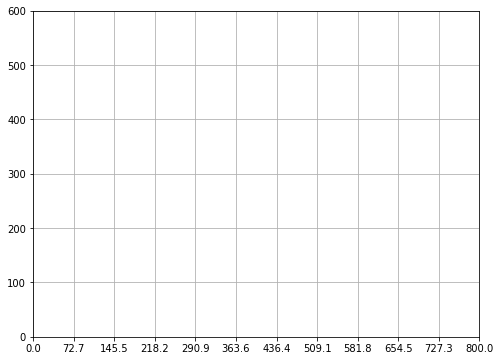

In [45]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0,800)
ax.set_ylim(0,600)

loc = plticker.MultipleLocator(base=800/11) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

plt.grid(True)

coords = []

def onclick(event):
#     global ix, iy
    ix, iy = event.xdata, event.ydata
    
    # invert
    y = 600 - iy
    x = ix
    
    print(f'{x:0.1f},{y:0.1f}')

    global coords
    coords.append((x, y))

#     if len(coords) == 2:
#         fig.canvas.mpl_disconnect(cid)

    ax.scatter([ix], [iy], c='b', s=150)
    plt.draw()

    return coords
cid = fig.canvas.mpl_connect('button_press_event', onclick)

fig.show()

### These are the points I made, in the shape of a heart

In [46]:
heart_points = [
(397.4,512.4),
(396.1,487.7),
(385.8,457.7),
(367.7,425.1),
(340.6,382.1),
(320.0,352.1),
(303.2,330.0),
(282.6,311.7),
(259.4,281.8),
(240.0,245.3),
(221.9,204.9),
(221.9,164.5),
(236.1,143.6),
(265.8,126.7),
(303.2,121.5),
(326.5,125.4),
(360.0,146.3),
(396.1,178.8),
(418.1,212.7),
(440.0,191.9),
(452.9,174.9),
(486.5,150.2),
(512.3,130.6),
(545.8,122.8),
(566.5,122.8),
(591.0,145.0),
(603.9,160.6),
(606.5,207.5),
(600.0,236.2),
(583.2,258.3),
(561.3,279.2),
(541.9,317.0),
(529.0,339.1),
(505.8,365.2),
(483.9,387.3),
(465.8,421.2),
(449.0,447.3),
(433.5,468.1),
(419.4,491.6),
]

### Make parts and code for special effects

In [47]:
# must be higher than all parts in above sections
HEART_STARTING_ID = 300

# add break in the text (for help with debugging)
txt += '\n\n\n'

# parent part to hold all the text parts
text_parent_id = HEART_STARTING_ID
txt += f'rightTri, 0, 0, 0, {invis}, e0, {text_parent_id}, 0066FF'

# parent will sit far away until needed
append(setDistance(text_parent_id, FAR_AWAY))

# make text parts
_ids = []
for idx, (x, y) in enumerate(heart_points):
    new_id = HEART_STARTING_ID+1+idx
    txt += f'c, {x-400:0.2f}, {y-300:0.2f}, 0, {invis}, e{text_parent_id}, {new_id}, FFFFFF'
    txt += '\n'
    _ids.append(new_id)

########### next, make a whole bunch of triggers that all happen "on_death" (meaning, once the final starship is destroyed)

# helper function to make code more succinct
on_death = lambda cmd: append(makeTriggerDeath(parts['starship_center'], cmd))
## change trigger ID, just for testing (without having to beat the whole level)
#on_death = lambda cmd: append(makeTriggerDeath(339, cmd)) # for testing

# first, move into position
on_death(setDistance(text_parent_id, 0))

# then, make the text appear, one circle at a time, and do color effect
delay = 2
init_time_delay = 120
for idx, id in enumerate(_ids):
    t = init_time_delay + (idx+1)*delay
    
    # change size from 0 (this makes it suddenly appear on-screen)
    grow = setSize(id, 20)
    on_death(makeTriggerTime(t, grow[0]))
    on_death(makeTriggerTime(t, grow[1]))
    
    # change color, for effect, a split second later
    change_color = setColor(id, 'CC0000')
    on_death(makeTriggerTime(t+5, change_color))
    
# when done, end level
on_death(makeTriggerTime(init_time_delay+(idx+1)*delay+5+30, destroy(0)))

setDistance, 9999, 300
makeTrigger, death, 208, setDistance, 0, 300
makeTrigger, death, 208, makeTrigger, time, 122, setWidth, 20, 301
makeTrigger, death, 208, makeTrigger, time, 122, setHeight, 20, 301
makeTrigger, death, 208, makeTrigger, time, 127, col, CC0000, 301
makeTrigger, death, 208, makeTrigger, time, 124, setWidth, 20, 302
makeTrigger, death, 208, makeTrigger, time, 124, setHeight, 20, 302
makeTrigger, death, 208, makeTrigger, time, 129, col, CC0000, 302
makeTrigger, death, 208, makeTrigger, time, 126, setWidth, 20, 303
makeTrigger, death, 208, makeTrigger, time, 126, setHeight, 20, 303
makeTrigger, death, 208, makeTrigger, time, 131, col, CC0000, 303
makeTrigger, death, 208, makeTrigger, time, 128, setWidth, 20, 304
makeTrigger, death, 208, makeTrigger, time, 128, setHeight, 20, 304
makeTrigger, death, 208, makeTrigger, time, 133, col, CC0000, 304
makeTrigger, death, 208, makeTrigger, time, 130, setWidth, 20, 305
makeTrigger, death, 208, makeTrigger, time, 130, setHeight, 2

# Finally, copy each of these to the game editor

In [50]:
copy_to_clipboard(cmds)

makeInvincible, 8
makeTrigger, death, 5, setWidth, 2000, 8
makeTrigger, death, 5, setHeight, 2000, 8
makeTrigger, death, 6, setWidth, 2000, 8
makeTrigger, death, 6, setHeight, 2000, 8
makeTrigger, death, 7, setWidth, 2000, 8
makeTrigger, death, 7, setHeight, 2000, 8
makeTrigger, death, 9, setDistance, 9999, 7
setDistance, 9999, 12
makeTrigger, death, 9, setDistance, 282.84, 12
makeTrigger, death, 12, setDistance, 9999, 5
setDistance, 9999, 13
makeTrigger, death, 12, setDistance, 282.84, 13
makeTrigger, death, 13, setDistance, 9999, 6
setDistance, 9999, 14
makeTrigger, death, 13, setDistance, 282.84, 14
makeInvincible, 22,23,24,25
makeTrigger, death, 9, makeTrigger, timeRepeat, 0, 330, enableGun, 15
makeTrigger, death, 9, makeTrigger, timeRepeat, 30, 330, disableGun, 15
makeTrigger, death, 9, makeTrigger, timeRepeat, 0, 3, setGunTime, 298, 15
makeTrigger, death, 9, makeTrigger, timeRepeat, 9, 330, enableGun, 16
makeTrigger, death, 9, makeTrigger, timeRepeat, 39, 330, disableGun, 16
make

In [49]:
print(txt)
copy(txt)


core, 400, 300, 0, 0.5, 0.5, -1, 0, 33CCFF
c, 1, -3, 0, 0, 0, e0, 8, FF0000
switch1b, 200, 200, 0, 1, 1, e0, 4, FFFFFF
switch1b, -200, 200, 0, 1, 1, e0, 3, FFFFFF
switch1b, 200, -200, 0, 1, 1, e0, 2, FFFFFF
switch1b, -200, -200, 0, 1, 1, e0, 1, FFFFFF

switch2b, -200, -200, 0, 2, 2, e0, 9, FF0033
switch2b, 200, -200, 0, 2, 2, e0, 5, FF0033
switch2b, -200, 200, 0, 2, 2, e0, 7, FF0033
switch2b, 200, 200, 0, 2, 2, e0, 6, FF0033

switch2b, -200, 200, 0, 2, 2, e0, 12, FF0033
switch2b, 200, -200, 0, 2, 2, e0, 13, FF0033
switch2b, 200, 200, 0, 2, 2, e0, 14, FF0033

rect, 20, 20, -45, 5, 1, e1, 22, 339900
rect, 20, -20, -135, 5, 1, e3, 23, 339900
rect, -20, 20, -135, 5, 1, e2, 24, 339900
rect, -20, -20, -45, 5, 1, e4, 25, 339900

jet, 0, 0, 0, 0, 0, e3, 21, 0066FF
jet, 0, 0, 0, 0, 0, e4, 26, 0066FF
jet, 0, 0, 0, 0, 0, e2, 35, 0066FF

spread, 0, 50, 0, 0, 0, e21, 15, 666666
spread, 50, 0, 0, 0, 0, e21, 16, 666666
spread, 0, -50, 0, 0, 0, e21, 17, 666666
spread, -50, 0, 0, 0, 0, e21, 18, 666666